# **User Behavior Visualization Analytics**

-----Sensor Data-----
            timestamp user_id    action  time_spent  error_flag
0 2025-06-18 09:15:00   CS208     login         120         0.0
1 2025-06-18 09:30:00   CS204    search         180         NaN
2 2025-06-18 10:45:00   CS206      view          90         0.0
3 2025-06-19 11:20:00   CS203  purchase         300         1.0
4 2025-06-19 14:00:00   CS204    logout          60         0.0

-----Missing Values in Sensor Data-----
timestamp     0
user_id       0
action        0
time_spent    0
error_flag    3
dtype: int64


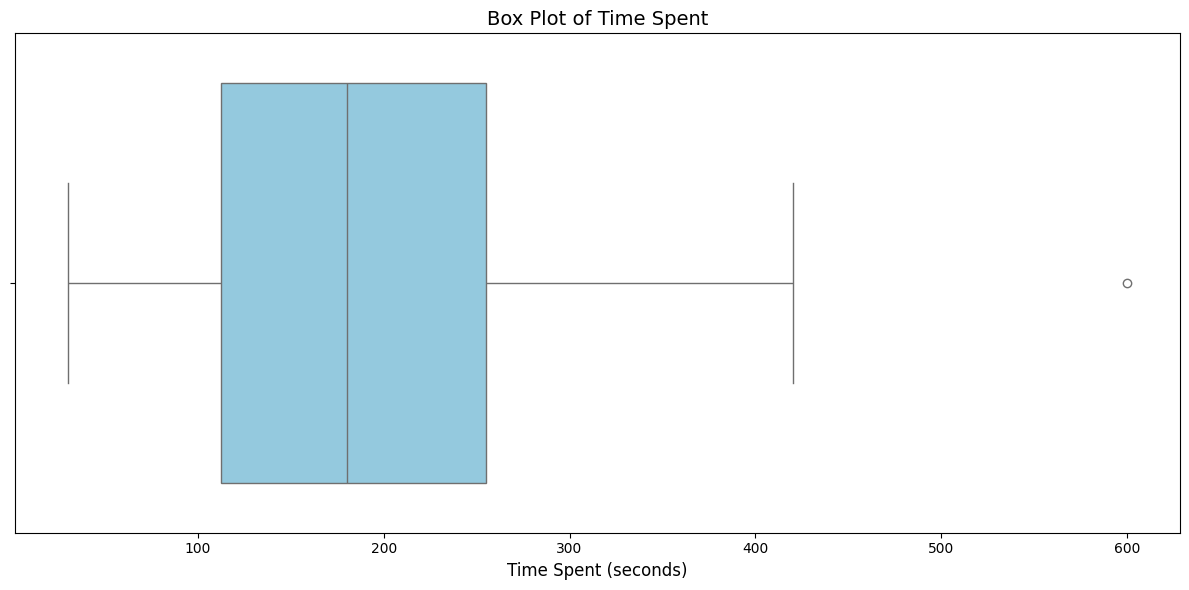

/tmp/ipython-input-1-472946431.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='action', data=df_sensor, palette='viridis',


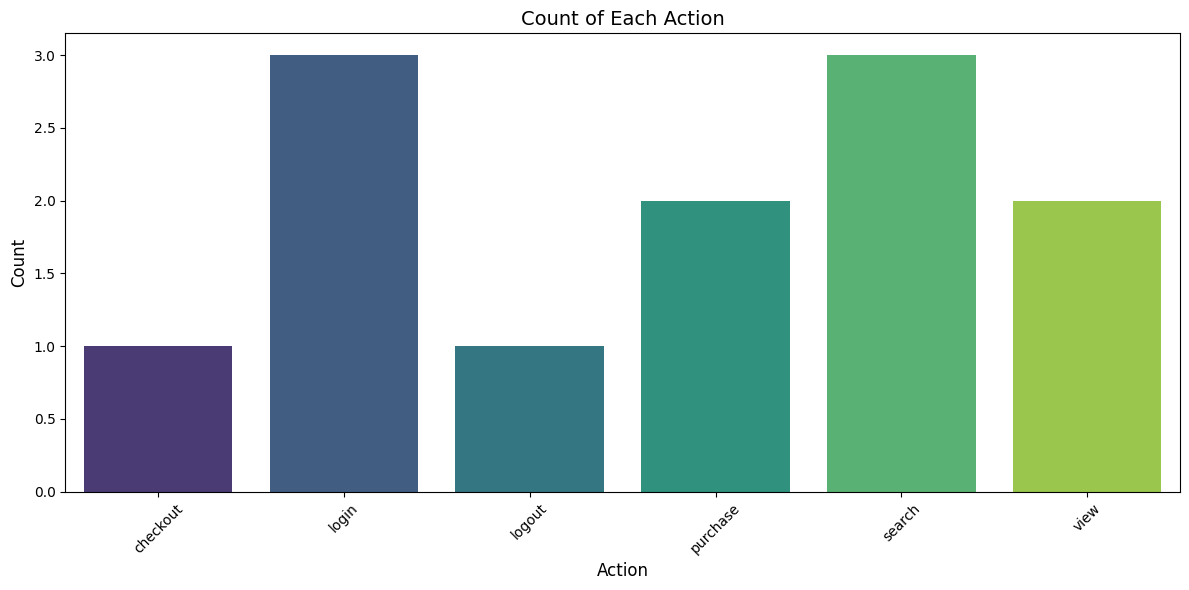

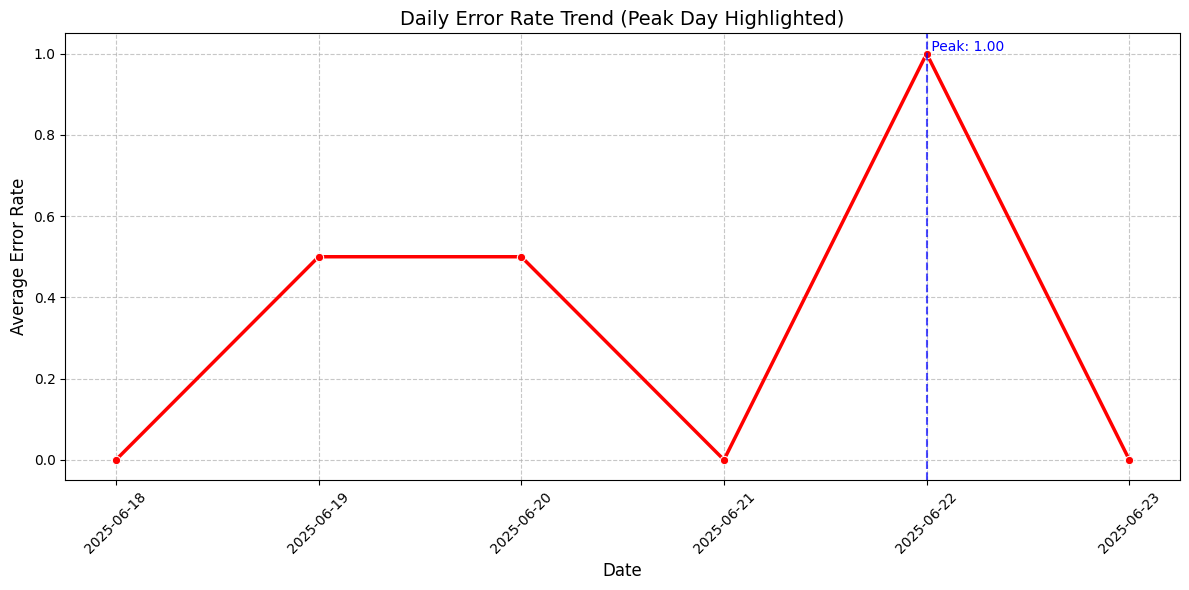


-----Analysis of Unusual Patterns-----

Potential time_spent outliers (top 5% > 500.9999999999999 seconds):
             timestamp user_id    action  time_spent  error_flag
10 2025-06-22 18:30:00   CS208  checkout         600         1.0

Error occurrences:
             timestamp user_id    action  time_spent  error_flag
3  2025-06-19 11:20:00   CS203  purchase         300         1.0
6  2025-06-20 16:30:00   CS209      view         150         1.0
9  2025-06-22 12:00:00   CS202    search         180         1.0
10 2025-06-22 18:30:00   CS208  checkout         600         1.0

Possible reasons for patterns:
- High time_spent values might indicate:
  * Users leaving sessions open without activity
  * Complex processes (like checkout) taking longer
  * System performance issues causing delays
- Error spikes might correlate with:
  * Specific actions (like purchases/checkouts)
  * High traffic periods
  * Recent system updates/maintenance

-----User Behavior Analysis-----

User Statistic

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set uniform figure size for all plots
UNIFORM_FIG_SIZE = (12, 6)

# New dataset with updated user_ids
data = {
    'timestamp': ['2025-06-18 09:15:00', '2025-06-18 09:30:00', '2025-06-18 10:45:00',
                  '2025-06-19 11:20:00', '2025-06-19 14:00:00', '2025-06-20 08:05:00',
                  '2025-06-20 16:30:00', '2025-06-21 10:10:00', '2025-06-21 15:45:00',
                  '2025-06-22 12:00:00', '2025-06-22 18:30:00', '2025-06-23 09:00:00'],
    'user_id': ['CS208', 'CS204', 'CS206', 'CS203', 'CS204', 'CS201',
                'CS209', 'CS206', 'CS207', 'CS202', 'CS208', 'CS205'],
    'action': ['login', 'search', 'view', 'purchase', 'logout', 'search',
               'view', 'purchase', 'login', 'search', 'checkout', 'login'],
    'time_spent': [120, 180, 90, 300, 60, 240, 150, 420, 200, 180, 600, 30],
    'error_flag': [0, np.nan, 0, 1, 0, np.nan, 1, 0, np.nan, 1, 1, 0]
}

df_sensor = pd.DataFrame(data)

# Convert 'timestamp' to datetime and sort
df_sensor['timestamp'] = pd.to_datetime(df_sensor['timestamp'])
df_sensor = df_sensor.sort_values(by='timestamp')

print("-----Sensor Data-----")
print(df_sensor.head())

# Check missing values
print("\n-----Missing Values in Sensor Data-----")
print(df_sensor.isnull().sum())

# Handle missing values for 'error_flag' by filling missing with 0
df_sensor['error_flag'] = df_sensor['error_flag'].fillna(0)

# Create visualizations

# Boxplot of time_spent
plt.figure(figsize=UNIFORM_FIG_SIZE)
bp = sns.boxplot(x=df_sensor['time_spent'], color='skyblue')
plt.title('Box Plot of Time Spent', fontsize=14)
plt.xlabel('Time Spent (seconds)', fontsize=12)

# Highlight outliers
fliers = [flier for flier in bp.get_lines() if flier.get_linestyle() == 'none']
for flier in fliers:
    flier.set(marker='o', color='red', alpha=0.5)
plt.tight_layout()
plt.show()

# Count plot of user action
plt.figure(figsize=UNIFORM_FIG_SIZE)
sns.countplot(x='action', data=df_sensor, palette='viridis',
              order=sorted(df_sensor['action'].unique()))
plt.title('Count of Each Action', fontsize=14)
plt.xlabel('Action', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Line plot showing error_flag trends per day with highlight
df_sensor['date'] = df_sensor['timestamp'].dt.date
error_rate = df_sensor.groupby('date')['error_flag'].mean().reset_index()

plt.figure(figsize=UNIFORM_FIG_SIZE)
ax = sns.lineplot(x='date', y='error_flag', data=error_rate,
                 marker='o', color='red', linewidth=2.5)

# Highlight day with highest average error rate
if not error_rate.empty:
    max_error_day = error_rate.loc[error_rate['error_flag'].idxmax()]
    ax.axvline(x=max_error_day['date'], color='blue', linestyle='--', alpha=0.7)
    ax.text(max_error_day['date'], max_error_day['error_flag'],
            f' Peak: {max_error_day["error_flag"]:.2f}',
            color='blue', ha='left', va='bottom')

plt.title('Daily Error Rate Trend (Peak Day Highlighted)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Error Rate', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Analysis of Unusual Patterns
print("\n-----Analysis of Unusual Patterns-----")

# Identify time_spent outliers
if not df_sensor.empty:
    time_threshold = df_sensor['time_spent'].quantile(0.95)
    outliers = df_sensor[df_sensor['time_spent'] > time_threshold]
    print(f"\nPotential time_spent outliers (top 5% > {time_threshold} seconds):")
    print(outliers[['timestamp', 'user_id', 'action', 'time_spent', 'error_flag']])

    # Analyze error spikes
    error_spikes = df_sensor[df_sensor['error_flag'] == 1]
    print("\nError occurrences:")
    print(error_spikes[['timestamp', 'user_id', 'action', 'time_spent', 'error_flag']])

    # Suggested reasons
    print("\nPossible reasons for patterns:")
    print("- High time_spent values might indicate:")
    print("  * Users leaving sessions open without activity")
    print("  * Complex processes (like checkout) taking longer")
    print("  * System performance issues causing delays")
    print("- Error spikes might correlate with:")
    print("  * Specific actions (like purchases/checkouts)")
    print("  * High traffic periods")
    print("  * Recent system updates/maintenance")

# User Behavior Analysis
print("\n-----User Behavior Analysis-----")
if not df_sensor.empty:
    user_stats = df_sensor.groupby('user_id').agg({
        'time_spent': ['mean', 'max', 'count'],
        'error_flag': 'mean',
        'action': lambda x: x.value_counts().index[0] if not x.empty else None
    }).reset_index()

    user_stats.columns = ['user_id', 'avg_time_spent', 'max_time_spent',
                         'session_count', 'error_rate', 'frequent_action']

    print("\nUser Statistics:")
    print(user_stats.sort_values(by='avg_time_spent', ascending=False))